# Relatório de Análise de Evasão de Clientes - TelecomX

## Introdução

A evasão de clientes (conhecida como *churn*) representa um dos principais desafios estratégicos para empresas de telecomunicações.
Este estudo tem como objetivo **analisar o comportamento dos clientes da TelecomX** para identificar padrões que indiquem maior propensão ao cancelamento de serviços e para criar ações preventivas/personalizadas para retenção.


## Limpeza e Tratamento de Dados

Foram feitos alguns procedimentos de limpeza e preparação dos dados:

- **Padronização de texto**: Conversão de strings para minúsculas e substituição de espaços por underscores (`_`).
- **Remoção e substituição de valores inconsistentes**: Valores como `'No internet service'` foram tratados e padronizados para `'no'`.
- **Conversão de colunas binárias**: Transformação de variáveis com `"yes"` e `"no"` em valores binários (1 e 0) para facilitar análises quantitativas.
- **Tratamento de campos vazios**: Substituição de strings vazias por `NaN` (`numpy.nan`) e preenchimento e exclusão consciente de registros.
- **Criação de nova variável**: A coluna `daily_account` foi criada a partir de `charges_monthly / 30` para estimar o gasto diário do cliente.


## Análise Exploratória de Dados

### Distribuição de Churn
- **Aproximadamente 26,5%** dos clientes cancelaram os serviços.
- A maioria dos clientes manteve seu contrato com a empresa.

### Churn por variáveis categóricas
- **Tipo de contrato**: Clientes com contrato *Month-to-month* apresentaram as maiores taxas de churn.
- **Forma de pagamento**: Clientes que utilizam *Electronic check* têm maior taxa de evasão.
- **Gênero**: Não houve diferença significativa entre homens e mulheres.

### Variáveis numéricas e churn

#### Gasto total (`charges_total`)
- Clientes que cancelaram gastaram **menos em média** (mediana de R$ 703,55) do que os que permaneceram (mediana de R$ 1.683,60).
- Possível indicativo de que clientes que gastam pouco estão em estágio de experimentação ou têm menor fidelidade.

#### Tempo de contrato (`tenure`)
- Clientes que cancelaram tinham, em média, **tempo de contrato 2x menor**.
- Maior evasão acontece nos **primeiros 12 meses**, indicando pouca retenção inicial.

Gráficos de boxplot reforçaram visualmente essas diferenças.

---

## Conclusões e Insights

- **Churn está concentrado em clientes recentes e de baixo gasto.**
- **Contratos mensais** e **pagamentos eletrônicos** estão associados a maior rotatividade.
- Algumas variáveis não mostraram correlação direta (como gênero), enquanto outras, como tipo de contrato e tenure, mostraram forte influência.

---

## Recomendações Estratégicas

1. **Foco na retenção precoce**: Atuar nos primeiros 12 meses com ofertas e programas de fidelização.
2. **Revisão da experiência digital**: Métodos de pagamento como *electronic check* devem ser reavaliados, pois estão ligados a maior evasão.
3. **Modelagem preditiva**: Utilizar os dados tratados para treinar modelos de machine learning e prever clientes com risco de churn.
4. **Ações segmentadas**: Criar campanhas específicas para perfis com maior propensão à saída.


In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

In [3]:
df= pd.read_json(url)
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [4]:
#normalizando os dados aninhados para linhas e colunas e 
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

df_telecom = pd.concat([df[['customerID','Churn']],df_customer, df_phone, df_internet, df_account], axis=1)

In [5]:
df_telecom.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [6]:
# tipo Object tem 3 possibilidades:
# 1 - muitos dados diferentes e n conseguiu identificar
# 2 - possui um tipo especifico na leitura não foi dentificado
# 3 - È um tipo string
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [7]:
# verificando valores ausentes (NaN)
df_telecom.isnull().sum()

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

In [8]:
# valores duplicados
df_telecom.duplicated().sum()
#exibir linhas duplicadas
df_telecom[df_telecom.duplicated()]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total


In [9]:
#Checagem de erros de formatação (espaços, texto inconsistente)
# Remover espaços em branco extras das colunas categóricas
for col in df_telecom.select_dtypes(include='object').columns:
    df_telecom[col] = df_telecom[col].str.strip()
# Verificar se há valores diferentes apenas por erro de digitação/maiúscula
for col in df_telecom.select_dtypes(include='object').columns:
    print(f"{col}: {df_telecom[col].unique()}")

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes' '']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Charges.Total: ['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


In [10]:
#Detectar inconsistências nas categorias Exemplo: valores como "Yes", "yes", "Sim", " Yess " na mesma coluna.
# Listar categorias únicas por variável categórica
for col in df_telecom.select_dtypes(include='object').columns:
    print(f"\n{col}:\n", df_telecom[col].value_counts(dropna=False))



customerID:
 customerID
0002-ORFBO    1
6614-VBEGU    1
6637-KYRCV    1
6635-MYYYZ    1
6635-CPNUN    1
             ..
3374-TTZTK    1
3374-PZLXD    1
3374-LXDEV    1
3373-YZZYM    1
9995-HOTOH    1
Name: count, Length: 7267, dtype: int64

Churn:
 Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

gender:
 gender
Male      3675
Female    3592
Name: count, dtype: int64

Partner:
 Partner
No     3749
Yes    3518
Name: count, dtype: int64

Dependents:
 Dependents
No     5086
Yes    2181
Name: count, dtype: int64

PhoneService:
 PhoneService
Yes    6560
No      707
Name: count, dtype: int64

MultipleLines:
 MultipleLines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64

InternetService:
 InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64

OnlineSecurity:
 OnlineSecurity
No                     3608
Yes                    2078
No internet service    1581
Name: count, dty

In [11]:
# Importante: garantir que strings vazias virem NaN

##Detectar strings vazias (''), que não são NaN
df_telecom[df_telecom['Charges.Total'] == '']

#quantos existem
(df_telecom['Charges.Total'] == '').sum()

#Detectar espaços em branco (' ') Esses são ainda mais traiçoeiros, parecem “invisíveis” mas não são considerados vazios.
df_telecom[df_telecom['Charges.Total'].str.strip() == '']

# padronizando tudo que for string vazia ou espaço para NaN
df_telecom['Charges.Total'] = df_telecom['Charges.Total'].replace(r'^\s*$', np.nan, regex=True)


In [12]:
# Converter para float64
df_telecom['ChargesTotal'] = df_telecom['Charges.Total'].astype(np.float64)

In [13]:
# na variavel-alvo "churn" possui 224 valores vazios. 
#solução: se a quantidade for pequena em relação ao total de dados removemos senão preenchemos com 
#treinamento de modelo de Previsão.
#(224 / 7267) * 100 ≈ representa 3.08% do total.

#deletando os dados 
df_telecom = df_telecom[df_telecom['Churn'].str.strip() != '']


In [14]:
#Padronizar sintaxe
df_telecom.loc[:, col] = (
    df_telecom[col]
    .astype(str)
    .str.strip()
    .str.lower()
    .str.replace(r'\s+', '_', regex=True)
)



In [15]:
def padronizar_textos(df):
    for col in df.select_dtypes(include='object').columns:
        df.loc[:, col] = (
            df[col]
            .astype(str)
            .str.strip()
            .str.lower()
            .str.replace(r'\s+', '_', regex=True)
        )
    return df
df_telecom = padronizar_textos(df_telecom)



In [16]:
#Padronizando nome de colunas
df_telecom.columns = (
    df_telecom.columns
    .str.strip()         # remove espaços no início/fim
    .str.lower()         # converte para letras minúsculas
    .str.replace(r'\s+', '_', regex=True)  # substitui espaços internos por "_"
    .str.replace('.', '_', regex=False)    # substitui pontos por "_"
    .str.replace('customerid','customer_id')
    .str.replace('seniorcitizen','senior_citizen')
    .str.replace('phoneservice','phone_service')
    .str.replace('multiplelines','multiple_lines')
    .str.replace('internetservice','internet_service')
    .str.replace('OnlineSecurity','Online_Security') 
    .str.replace('onlinebackup','online_backup')
    .str.replace('deviceprotection','device_protection')
    .str.replace('techsupport','tech_support')
    .str.replace('streamingtv','streaming_tv')
    .str.replace('streamingmovie','streaming_movie')
    .str.replace('paperlessbilling','paper_less_billing')
    .str.replace('paymentmethod','payment_method')
)


In [17]:
# Converter para float64
df_telecom['charges_total'] = df_telecom['charges_total'].astype(np.float64)
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         7043 non-null   object 
 1   churn               7043 non-null   object 
 2   gender              7043 non-null   object 
 3   senior_citizen      7043 non-null   int64  
 4   partner             7043 non-null   object 
 5   dependents          7043 non-null   object 
 6   tenure              7043 non-null   int64  
 7   phone_service       7043 non-null   object 
 8   multiple_lines      7043 non-null   object 
 9   internet_service    7043 non-null   object 
 10  onlinesecurity      7043 non-null   object 
 11  online_backup       7043 non-null   object 
 12  device_protection   7043 non-null   object 
 13  tech_support        7043 non-null   object 
 14  streaming_tv        7043 non-null   object 
 15  streaming_movies    7043 non-null   object 
 16  contract   

In [18]:
df_telecom

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paper_less_billing,payment_method,charges_monthly,charges_total,chargestotal
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one_year,yes,mailed_check,65.60,593.30,593.30
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,month-to-month,no,mailed_check,59.90,542.40,542.40
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber_optic,...,yes,no,no,no,month-to-month,yes,electronic_check,73.90,280.85,280.85
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber_optic,...,yes,no,yes,yes,month-to-month,yes,electronic_check,98.00,1237.85,1237.85
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber_optic,...,no,yes,yes,no,month-to-month,yes,mailed_check,83.90,267.40,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-lutyd,no,female,0,no,no,13,yes,no,dsl,...,no,yes,no,no,one_year,no,mailed_check,55.15,742.90,742.90
7263,9992-rramn,yes,male,0,yes,no,22,yes,yes,fiber_optic,...,no,no,no,yes,month-to-month,yes,electronic_check,85.10,1873.70,1873.70
7264,9992-ujoel,no,male,0,no,no,2,yes,no,dsl,...,no,no,no,no,month-to-month,yes,mailed_check,50.30,92.75,92.75
7265,9993-lhieb,no,male,0,yes,yes,67,yes,no,dsl,...,yes,yes,no,yes,two_year,no,mailed_check,67.85,4627.65,4627.65


In [19]:
# criando nova coluna contas diarias
df_telecom['daily_accounts']= df_telecom['charges_monthly']/30
#df_telecom.info()

In [20]:
#copia
df_telecom_binario = df_telecom.copy()

# Transformando colunas categoricas em binarias para treinamento de algoritmo.
colunas_binarias = [
    'churn', 'partner', 'dependents', 'phone_service',
    'paper_less_billing', 'onlinesecurity', 'online_backup',
    'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies'
]


# Converter 'yes' para 1 e 'no' para 0
for col in colunas_binarias:
    df_telecom_binario[col] = df_telecom_binario[col].map({'yes': 1, 'no': 0})
    
df_telecom_binario[colunas_binarias].head()


,churn,partner,dependents,phone_service,paper_less_billing,onlinesecurity,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,0,1,1,1,1,0.0,1.0,0.0,1.0,1.0,0.0
1,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,0,0,1,1,0.0,0.0,1.0,0.0,0.0,0.0
3,1,1,0,1,1,0.0,1.0,1.0,0.0,1.0,1.0
4,1,1,0,1,1,0.0,0.0,0.0,1.0,1.0,0.0


In [21]:
# valores como "no_internet_service" e "no_phone_service" são categorias compostas que indicam explicitamente a ausência
# daquele serviço.Se o cliente não tem esse serviço podemos tranformar em 0.
# Mapear valores compostos para 'no'
df_telecom_binario = df_telecom.copy()
substituir_valores = {
    'no_internet_service': 'no',
    'no_phone_service': 'no'}
colunas_com_valores_compostos = [
    'online_backup', 'onlinesecurity', 'device_protection',
    'tech_support', 'streaming_tv', 'streaming_movies',
    'phone_service', 'multiple_lines'
]
# Aplicar substituições
for col in colunas_com_valores_compostos:
    df_telecom_binario[col] = df_telecom_binario[col].replace(substituir_valores)

#conversão binaria 
colunas_binarias = [
    'churn', 'partner', 'dependents', 'phone_service',
    'paper_less_billing', 'onlinesecurity', 'online_backup',
    'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies'
]

for col in colunas_binarias:
    df_telecom_binario[col] = df_telecom_binario[col].map({'yes': 1, 'no': 0})


In [22]:
df_telecom_binario[colunas_binarias].head()


,churn,partner,dependents,phone_service,paper_less_billing,onlinesecurity,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,0,1,1,1,1,0,1,0,1,1,0
1,0,0,0,1,0,0,0,0,0,0,1
2,1,0,0,1,1,0,0,1,0,0,0
3,1,1,0,1,1,0,1,1,0,1,1
4,1,1,0,1,1,0,0,0,1,1,0


In [23]:
##Load and Analysis

In [24]:
df_telecom.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
senior_citizen,7043.0,0.162147,0.368612,0.000000,0.000000,0.000,0.0000,1.000000
tenure,7043.0,32.371149,24.559481,0.000000,9.000000,29.000,55.0000,72.000000
charges_monthly,7043.0,64.761692,30.090047,18.250000,35.500000,70.350,89.8500,118.750000
charges_total,7032.0,2283.300441,2266.771362,18.800000,401.450000,1397.475,3794.7375,8684.800000
chargestotal,7032.0,2283.300441,2266.771362,18.800000,401.450000,1397.475,3794.7375,8684.800000
daily_accounts,7043.0,2.158723,1.003002,0.608333,1.183333,2.345,2.9950,3.958333


In [25]:
#usando o data frame binario para analisar evasão: 1 para os que sairam e 0 para que ficou
df_telecom_binario['churn'].value_counts(normalize=True) * 100


churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64

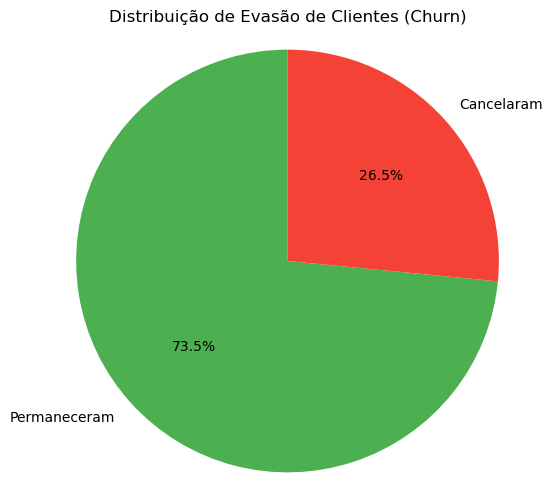

In [26]:
# Contagem percentual
churn_dist = df_telecom_binario['churn'].value_counts(normalize=True) * 100

# Labels para o gráfico
labels = ['Permaneceram', 'Cancelaram']
cores = ['#4CAF50', '#F44336']  # verde e vermelho

# Plot
plt.figure(figsize=(6,6))
plt.pie(churn_dist, labels=labels, colors=cores, autopct='%.1f%%', startangle=90)
plt.title('Distribuição de Evasão de Clientes (Churn)')
plt.axis('equal')  # circulo perfeito
plt.show()


In [27]:
# Exemplo com gênero
pd.crosstab(df_telecom_binario['gender'], df_telecom_binario['churn'], normalize='index') * 100


churn,0,1
gender,,
female,73.079128,26.920872
male,73.839662,26.160338


In [28]:
variaveis_categoricas = ['gender', 'contract', 'payment_method', 'internet_service']

for var in variaveis_categoricas:
    print(f"\n{var.upper()}")
    display(pd.crosstab(df_telecom_binario[var], df_telecom_binario['churn'], normalize='index') * 100)



GENDER


churn,0,1
gender,,
female,73.079128,26.920872
male,73.839662,26.160338



CONTRACT


churn,0,1
contract,,
month-to-month,57.290323,42.709677
one_year,88.730482,11.269518
two_year,97.168142,2.831858



PAYMENT_METHOD


churn,0,1
payment_method,,
bank_transfer_(automatic),83.290155,16.709845
credit_card_(automatic),84.756899,15.243101
electronic_check,54.714588,45.285412
mailed_check,80.893300,19.106700



INTERNET_SERVICE


churn,0,1
internet_service,,
dsl,81.040892,18.959108
fiber_optic,58.107235,41.892765
no,92.595020,7.404980


In [29]:
#Média e mediana de gasto e tempo de contrato por grupo
#Desvio padrão e extremos (mínimo e máximo)

df_telecom_binario.groupby('churn')[['charges_total', 'tenure']].agg(['mean', 'median', 'std', 'min', 'max'])


charges_total                                           tenure         \
               mean   median          std    min      max       mean median   
churn                                                                         
0       2555.344141  1683.60  2329.456984  18.80  8672.45  37.569965   38.0   
1       1531.796094   703.55  1890.822994  18.85  8684.80  17.979133   10.0   

                          
             std min max  
churn                     
0      24.113777   0  72  
1      19.531123   1  72

C:\Users\wesle\AppData\Local\Temp\ipykernel_13524\2612397063.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='charges_total', data=df_telecom_binario, palette='Set2')


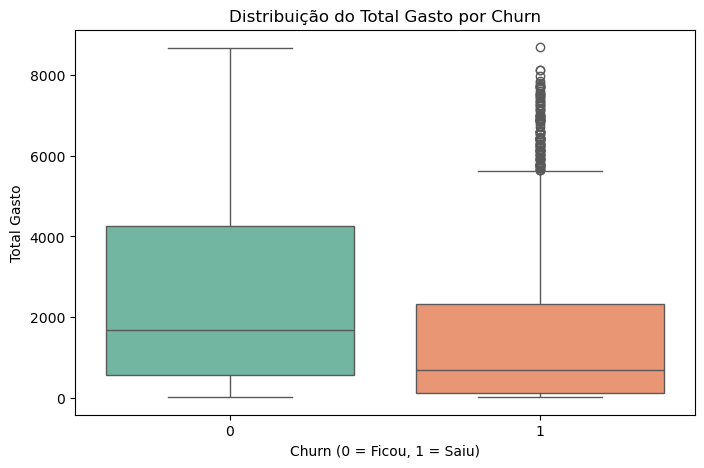

C:\Users\wesle\AppData\Local\Temp\ipykernel_13524\2612397063.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='tenure', data=df_telecom_binario, palette='Set1')


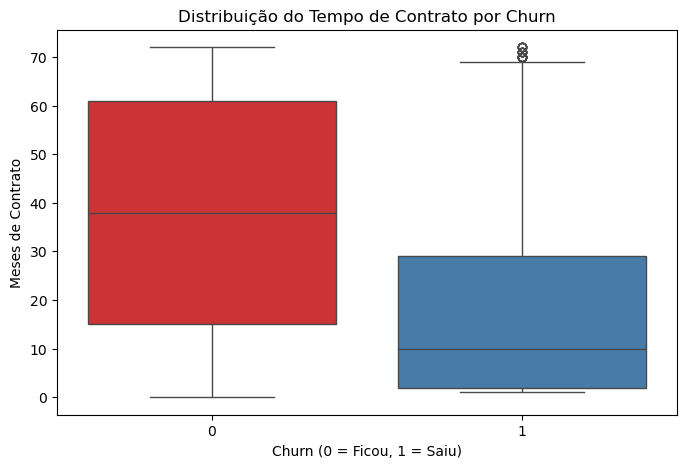

In [30]:
# Total gasto
plt.figure(figsize=(8, 5))
sns.boxplot(x='churn', y='charges_total', data=df_telecom_binario, palette='Set2')
plt.title('Distribuição do Total Gasto por Churn')
plt.xlabel('Churn (0 = Ficou, 1 = Saiu)')
plt.ylabel('Total Gasto')
plt.show()

# Tempo de contrato
plt.figure(figsize=(8, 5))
sns.boxplot(x='churn', y='tenure', data=df_telecom_binario, palette='Set1')
plt.title('Distribuição do Tempo de Contrato por Churn')
plt.xlabel('Churn (0 = Ficou, 1 = Saiu)')
plt.ylabel('Meses de Contrato')
plt.show()


In [31]:
#Esses gráficos ajudam a visualizar:

#Se clientes que saem tendem a ter menor tempo de contrato

#Se há um padrão de gasto associado à evasão.